In [63]:
import pandas as pd
from datetime import datetime, timedelta
from os import path
import glob
import matplotlib.pyplot as plt
import numpy as np

In [111]:
date = datetime.today() - timedelta(days = 1)
min_date = datetime(year = 2020, month = 1, day = 22)

data_dir = "data"

while date >= min_date:
    date_formatted = date.strftime("%m-%d-%Y")
    filepath = f"{data_dir}/{date_formatted}.csv"
    if not path.isfile(filepath):    
        url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_formatted}.csv"
        dataframe = pd.read_csv(url)
        dataframe.to_csv(filepath, index = False)
        print(f"Saved {filepath}")
    else:
        print(f"Skipped {filepath}")
    date = date - timedelta(days = 1)

Skipped data/03-22-2020.csv
Skipped data/03-21-2020.csv
Skipped data/03-20-2020.csv
Skipped data/03-19-2020.csv
Skipped data/03-18-2020.csv
Skipped data/03-17-2020.csv
Skipped data/03-16-2020.csv
Skipped data/03-15-2020.csv
Skipped data/03-14-2020.csv
Skipped data/03-13-2020.csv
Skipped data/03-12-2020.csv
Skipped data/03-11-2020.csv
Skipped data/03-10-2020.csv
Skipped data/03-09-2020.csv
Skipped data/03-08-2020.csv
Skipped data/03-07-2020.csv
Skipped data/03-06-2020.csv
Skipped data/03-05-2020.csv
Skipped data/03-04-2020.csv
Skipped data/03-03-2020.csv
Skipped data/03-02-2020.csv
Skipped data/03-01-2020.csv
Skipped data/02-29-2020.csv
Skipped data/02-28-2020.csv
Skipped data/02-27-2020.csv
Skipped data/02-26-2020.csv
Skipped data/02-25-2020.csv
Skipped data/02-24-2020.csv
Skipped data/02-23-2020.csv
Skipped data/02-22-2020.csv
Skipped data/02-21-2020.csv
Skipped data/02-20-2020.csv
Skipped data/02-19-2020.csv
Skipped data/02-18-2020.csv
Skipped data/02-17-2020.csv
Skipped data/02-16-2

In [168]:
data_files = glob.glob(f"{data_dir}/*.csv")

daily_dataframes = []

for file in data_files:
    daily_dataframe = pd.read_csv(file, parse_dates=[2])
    daily_dataframes.append(daily_dataframe)

combined_data = pd.concat(daily_dataframes, axis=0, ignore_index=True)
combined_data = combined_data.sort_values(by="Last Update", ascending=False)
combined_data = combined_data.drop(["Longitude", "Latitude"], axis=1)
combined_data["Country/Region"] = combined_data["Country/Region"].replace("United Kingdom", "UK")
combined_data["Country/Region"] = combined_data["Country/Region"].replace("Mainland China", "China")
combined_data["Last Update"] = combined_data["Last Update"].apply(lambda x: datetime.strftime(x, "%m/%d/%y"))

               Confirmed          Deaths        Recovered      
Country/Region     China      UK   China     UK     China    UK
Last Update                                                    
03/13/20         80195.0     NaN  3185.0    NaN   63461.0   NaN
03/14/20         96436.0  2283.0  3383.0   42.0   80908.0  39.0
03/15/20         82182.0     3.0  3188.0    0.0   68139.0   0.0
03/16/20         77182.0  1564.0  3216.0   58.0   64103.0  20.0
03/17/20         75930.0  1953.0  3174.0   55.0   63750.0  53.0
03/18/20         73196.0  2639.0  3183.0   71.0   61968.0  67.0
03/19/20         74262.0  2746.0  3195.0  141.0   63700.0  71.0
03/20/20         75512.0  3999.0  3209.0  177.0   65572.0  65.0
03/21/20         73850.0  5086.0  3182.0  233.0   64492.0  65.0
03/22/20         76516.0  5703.0  3210.0  281.0   67549.0  67.0


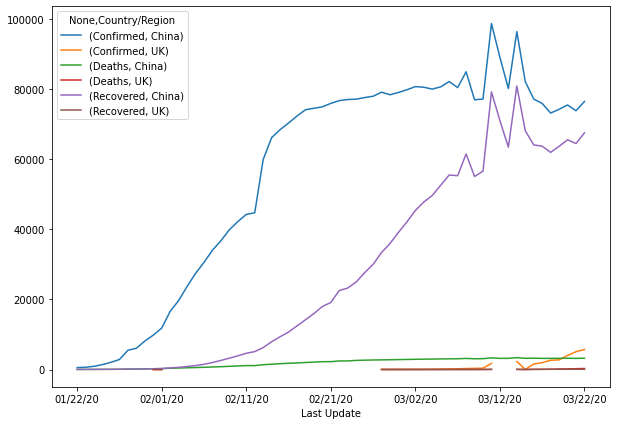

In [169]:
countries_selected = ["China", "UK"]
grouped_data = combined_data[combined_data["Country/Region"].isin(countries_selected)].groupby(by=["Last Update", "Country/Region"]).sum()
fig, ax = plt.subplots(figsize=(10,7))
clean_data = grouped_data.unstack()
print(clean_data.tail(10))
clean_data.plot(kind="line", ax=ax)